In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.optimizers import Adam

In [4]:
mf_dir='C:/Users/Mohammed Arif/Downloads/dog breed'
mf_dir

'C:/Users/Mohammed Arif/Downloads/dog breed'

In [68]:
img_width,img_height=512,512
batch_size=8
epochs=50

In [70]:
datagen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)

In [72]:
train_generator=datagen.flow_from_directory(mf_dir,
                                           target_size=(img_width,img_height),
                                           batch_size=batch_size,
                                           class_mode='categorical',
                                           subset='training')


Found 276 images belonging to 6 classes.


In [74]:
validation_generator=datagen.flow_from_directory(mf_dir,
                                                target_size=(img_width,img_height),
                                                batch_size=batch_size,
                                                class_mode="categorical",
                                                subset='validation')

Found 66 images belonging to 6 classes.


In [76]:
images,labels=next(train_generator)

In [77]:
print(images.shape)

(8, 512, 512, 3)


In [79]:
model=Sequential()

In [81]:
model.add(Conv2D(32,(3,3),input_shape=(img_width,img_height,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())

model.add(Dense(6,activation='sigmoid'))

model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 510, 510, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 255, 255, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 253, 253, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 124, 124, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 60, 60, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 230400)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │     1,382,406 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,770,822 (6.76 MB)

 Trainable params: 1,770,822 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [82]:
history=model.fit(train_generator,
                 steps_per_epoch=train_generator.samples//batch_size,
                 validation_data=validation_generator,
                 validation_steps=validation_generator.samples//batch_size,
                 epochs=epochs
                 )

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 135s 4s/step - accuracy: 0.1990 - loss: 2.0059 - val_accuracy: 0.1719 - val_loss: 1.7762
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.1250 - loss: 1.7946 - val_accuracy: 0.0000e+00 - val_loss: 1.7352
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 118s 3s/step - accuracy: 0.1933 - loss: 1.7789 - val_accuracy: 0.2969 - val_loss: 1.7270
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.2500 - loss: 1.7422 - val_accuracy: 0.0000e+00 - val_loss: 1.8788
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - accuracy: 0.3446 - loss: 1.7132 - val_accuracy: 0.4062 - val_loss: 1.6876
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2500 - loss: 1.7765 - val_accuracy: 0.0000e+00 - val_loss: 1.8070
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 187s 6s/step - accuracy: 0.3825 - loss: 1.5964 - val_accuracy: 0.3906 - val_loss: 1.4883
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6250 - loss: 1.6812 - val_accuracy: 

In [92]:
print("Classes indicies:",train_generator.class_indices)

Classes indicies: {'Beagle Image': 0, 'Bulldog Image': 1, 'German Shepherd': 2, 'Golden Retriever': 3, 'Labrador Retriever': 4, 'Poodle Image': 5}


In [94]:
def predict_image(filename):
    img=load_img(filename,target_size=(img_width,img_height))
    plt.imshow(img)
    plt.show()
    img_array=img_to_array(img)
    img_array=np.expand_dims(img_array,axis=0)
    img_array/=255.0
    
    prediction=model.predict(img_array)
    predicted_probability=prediction[0,0]
    class_idx=np.argmax(prediction)
    
    if class_idx==0:
        print("Beagle ")
    elif(class_idx==1):
        print("Bulldog ")
    elif(class_idx==2):
        print("German Shepherd")
    elif(class_idx==3):
        print("Golden Retrieve")
    elif(class_idx==4):
        print("Labrador Retriever")
    elif(class_idx==5):
        print("Poodle Image")
    else:
        print("dogs")

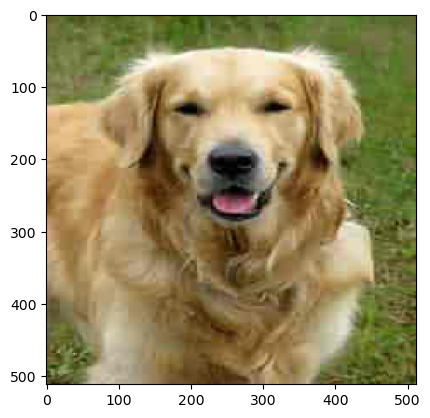

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Golden Retrieve


In [102]:
predict_image(r'C:\Users\Mohammed Arif\Downloads\dog breed\Golden Retriever\image23.jpeg')